# **Feedforward NN: Overfitting and Underfitting**

---




## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

**Majority of the code in this colab notebook is from: "Deep Learning with Python," Francois Chollet. Please see book's github at: https://github.com/fchollet/deep-learning-with-python-notebooks Code are editted by me for Applied AI class. - Behnam Kia**

## Overfitting

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.5048 - acc: 0.7872 - val_loss: 0.3775 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.2991 - acc: 0.9048 - val_loss: 0.3000 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.2173 - acc: 0.9284 - val_loss: 0.3083 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1747 - acc: 0.9437 - val_loss: 0.2827 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.1422 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1147 - acc: 0.9652 - val_loss: 0.3143 - val_acc: 0.8780
Epoch 7/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3131 - 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

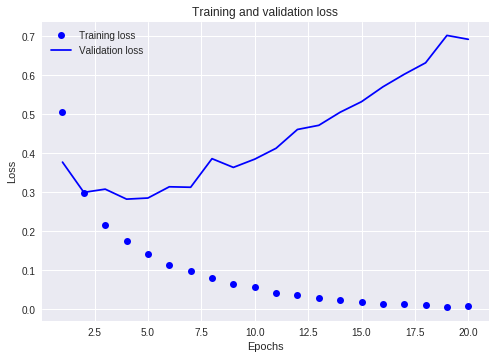

In [ ]:


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



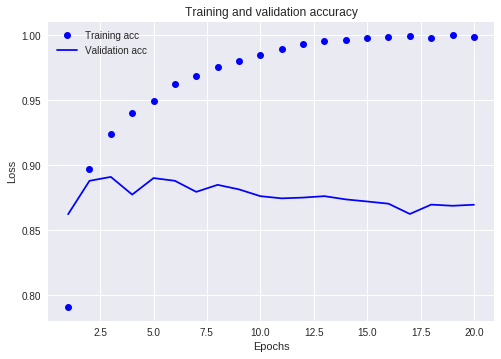

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=10000))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.4486 - acc: 0.8253
Epoch 2/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2575 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2009 - acc: 0.9272
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1692 - acc: 0.9391


In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 86us/step
[0.30035406308174134, 0.8802]


## L2 Regularization

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.4808 - acc: 0.8228 - val_loss: 0.3701 - val_acc: 0.8844
Epoch 2/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.3125 - acc: 0.9086 - val_loss: 0.3322 - val_acc: 0.8906
Epoch 3/20
25000/25000 [==============================] - 4s 155us/step - loss: 0.2684 - acc: 0.9232 - val_loss: 0.3332 - val_acc: 0.8869
Epoch 4/20
25000/25000 [==============================] - 4s 155us/step - loss: 0.2499 - acc: 0.9281 - val_loss: 0.3372 - val_acc: 0.8855
Epoch 5/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.2402 - acc: 0.9341 - val_loss: 0.3424 - val_acc: 0.8844
Epoch 6/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.2328 - acc: 0.9364 - val_loss: 0.3519 - val_acc: 0.8807
Epoch 7/20
25000/25000 [==============================] - 4s 155us/step - loss: 0.2271 - acc: 0.9379 - val_loss: 0.3607 - 

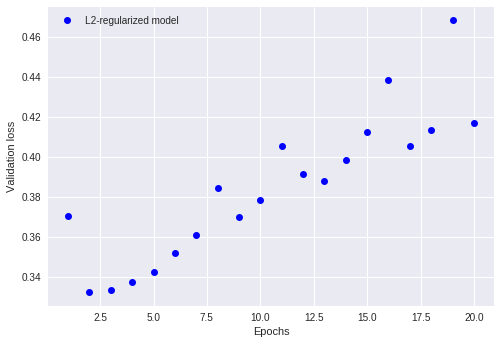

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.5774 - acc: 0.6940 - val_loss: 0.4162 - val_acc: 0.8676
Epoch 2/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.4180 - acc: 0.8273 - val_loss: 0.3192 - val_acc: 0.8840
Epoch 3/20
25000/25000 [==============================] - 4s 159us/step - loss: 0.3359 - acc: 0.8737 - val_loss: 0.2878 - val_acc: 0.8874
Epoch 4/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.2794 - acc: 0.8994 - val_loss: 0.2757 - val_acc: 0.8896
Epoch 5/20
25000/25000 [==============================] - 4s 157us/step - loss: 0.2435 - acc: 0.9140 - val_loss: 0.2855 - val_acc: 0.8892
Epoch 6/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.2141 - acc: 0.9266 - val_loss: 0.2979 - val_acc: 0.8876
Epoch 7/20
25000/25000 [==============================] - 4s 157us/step - loss: 0.1926 - acc: 0.9347 - val_loss: 0.3199 - 

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()